# Car accidents in Berlin, Germany, in 2019 

Public data is described at [Daten.Berlin.de](https://daten.berlin.de/datensaetze/strassenverkehrsunf%C3%A4lle-nach-unfallort-berlin-2019)

In [1]:
INPUT_FOLDER_NAME = "/Users/abuzatu/Work/data/geo_spatial/Germany/Berlin/Accidents_Car_2019"
INPUT_FILE_NAME = f"{INPUT_FOLDER_NAME}/AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2019_Datensatz.csv"

OUTPUT_FILE_NAME_STEM = f"{INPUT_FOLDER_NAME}/berlin_2019_car_accidents"

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(f"{INPUT_FILE_NAME}", sep=";", encoding = "ISO-8859-1")
df

,OBJECTID,LAND,BEZ,LOR,STRASSE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,49090,11,12,12301203,Wittenau Süd,2019,1,13,6,3,...,1,0,0,0,0,1,"794062,2837","5835083,823","13,34146","52,58609"
1,49091,11,3,3040818,Pankow Süd,2019,1,9,5,3,...,1,0,0,0,0,0,"799130,4007","5832327,415","13,41356","52,55862"
2,49093,11,12,12103115,Breitkopfbecken,2019,3,21,6,3,...,0,0,0,0,0,0,"795437,613","5833549,454","13,36034","52,57159"
3,49096,11,6,6040703,Nikolassee,2019,1,7,6,2,...,1,1,0,0,0,1,"786714,3754","5817042,137","13,21777","52,42825"
4,49097,11,7,7030303,Grazer Platz,2019,2,15,3,3,...,1,0,0,0,0,0,"796074,3342","5822724,905","13,36007","52,47421"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13385,202775,11,1,1011303,Alexanderplatzviertel,2019,12,15,2,3,...,1,1,0,0,0,0,"799498,019","5828344,449","13,41538","52,52271"
13386,202776,11,1,1011201,Wilhelmstraße,2019,12,14,2,3,...,1,0,0,0,0,0,"797455,1835","5827060,276","13,38421","52,51232"
13387,202777,11,1,1011304,Karl-Marx-Allee,2019,12,14,2,3,...,1,0,0,0,1,0,"799730,882","5827547,138","13,41808","52,51544"
13388,202778,11,11,11030721,Rüdigerstraße,2019,12,18,4,2,...,1,0,1,0,0,0,"805189,971","5827912,648","13,49862","52,51569"


In [4]:
df.shape

(13390, 24)

In [5]:
df.dtypes

OBJECTID        int64
LAND            int64
BEZ             int64
LOR             int64
STRASSE        object
UJAHR           int64
UMONAT          int64
USTUNDE         int64
UWOCHENTAG      int64
UKATEGORIE      int64
UART            int64
UTYP1           int64
ULICHTVERH      int64
IstRad          int64
IstPKW          int64
IstFuss         int64
IstKrad         int64
IstGkfz         int64
IstSonstige    object
USTRZUSTAND    object
LINREFX        object
LINREFY        object
XGCSWGS84      object
YGCSWGS84      object
dtype: object

# Meaning of variables

From the [metadata description](https://www.statistik-berlin-brandenburg.de/opendata/AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2019_Datensatzbeschreibung.pdf) in German, let's explore the data and describe in English what the variables and their values mean.

Land is 11, so Berlin, same in all this data.

BEZ means Bezirk, or neighborhood, described [here](https://www.statistik-berlin-brandenburg.de/regionales/rbs/lor.asp?Kat=4003). The geopandas polygons is not yet present, but we will get it from somewhere else later to be able to count and plot how many accidents are in each neighborhood. The number of accidents in each neighborhood. 

LOR seems to be some area within the neighborhood.

In [6]:
df.BEZ.value_counts()

1     2215
4     1727
2     1381
7     1241
3     1219
8      934
9      892
12     867
6      851
5      798
11     679
10     586
Name: BEZ, dtype: int64

STRASSE = Street Name

UJAHR = year, here only 2019 for all data

UMONAT = month of the year as number from 1 to 12

USTUNDE = hour of the day as number from 0 to 23

UWOCHENTAG = day of the weak, with Sun = 1, Mon = 2, Tue = 3, ..., Fri = 6, Sat = 7

In [7]:
df.UJAHR.value_counts()

2019    13390
Name: UJAHR, dtype: int64

In [8]:
# most accidents in warm months of the year
df.UMONAT.value_counts()

6     1448
8     1371
9     1270
10    1214
5     1207
7     1175
4     1104
11    1081
12     936
3      907
1      891
2      786
Name: UMONAT, dtype: int64

In [9]:
# most accidents in the afternoon
df.USTUNDE.value_counts()

16    1158
15    1120
17    1110
14     969
18     930
13     854
8      800
9      786
12     780
11     718
10     703
7      682
19     681
20     446
6      329
21     319
22     254
23     187
5      163
0      120
1      100
2       62
3       61
4       58
Name: USTUNDE, dtype: int64

In [10]:
# weekdays have more accidents than weekends
df.UWOCHENTAG.value_counts()

3    2248
4    2234
5    2180
2    2131
6    2115
7    1494
1     988
Name: UWOCHENTAG, dtype: int64

Category of how serious is the accident. 

1 = Accident with death
2 = Accident with serious injuries
3 = Accident with light injuries

Most accidents are light, about 7 times less are with serious injuries and from these 60 times rarer are accidents with deaths. 34 accidens per year in Berlin in 2019.

In [11]:
df.UKATEGORIE.value_counts()

3    11374
2     1982
1       34
Name: UKATEGORIE, dtype: int64

UART has 10 categories of how are the actors moving in the accident.

UTYP1 has 7 categories also of how are the actors moving in the accident, but from another perspective.

ULICHTVERH has 3 categories of how dark is it outside: 0 full light; 1 dim light; 2 darkness

IstRad if there is a bike involved: 0 no, 1 yes

IstPKW if there is a personal car involved: 0 no, 1 yes

IstFuss if there is a pedestrian involved: 0 no, 1 yes

IstKrad if there is a motorbike involved: 0 no, 1 yes

IstGkf if there is a truck involved: 0 no, 1 yes

IstSonstig if there is also an actor not mentioned above: 0 no, 1 yes

USTRZUSTAND how humid is the road: 0 not at all (dry), 1 wet as after rain, 2 wet with winter ice or freezing rain

## Coordinates

LINREFX, LINREFY. The coordinate of the accident is given in x, y coordinate in meters for Berlin ETRS89, Zone 32N. 

XGCSWGS84, YGCSWGS84. The coordinate of the accident in longitude, latitude. 

These are in strings with a comma. Let's convert them in numbers by first replacing the comma in a dot and then the string in a float.

In [12]:
df2 = df.copy()
for column in ["LINREFX", "LINREFY", "XGCSWGS84", "YGCSWGS84"]:
    df2[column] = df2[column].map(lambda x : float(x.replace(",", ".")))
df2.head()

,OBJECTID,LAND,BEZ,LOR,STRASSE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,49090,11,12,12301203,Wittenau Süd,2019,1,13,6,3,...,1,0,0,0,0,1,794062.2837,5835083.823,13.34146,52.58609
1,49091,11,3,3040818,Pankow Süd,2019,1,9,5,3,...,1,0,0,0,0,0,799130.4007,5832327.415,13.41356,52.55862
2,49093,11,12,12103115,Breitkopfbecken,2019,3,21,6,3,...,0,0,0,0,0,0,795437.6130,5833549.454,13.36034,52.57159
3,49096,11,6,6040703,Nikolassee,2019,1,7,6,2,...,1,1,0,0,0,1,786714.3754,5817042.137,13.21777,52.42825
4,49097,11,7,7030303,Grazer Platz,2019,2,15,3,3,...,1,0,0,0,0,0,796074.3342,5822724.905,13.36007,52.47421


## Check if there are any missing values

Answer: no missing values.

In [13]:
df2.dtypes

OBJECTID         int64
LAND             int64
BEZ              int64
LOR              int64
STRASSE         object
UJAHR            int64
UMONAT           int64
USTUNDE          int64
UWOCHENTAG       int64
UKATEGORIE       int64
UART             int64
UTYP1            int64
ULICHTVERH       int64
IstRad           int64
IstPKW           int64
IstFuss          int64
IstKrad          int64
IstGkfz          int64
IstSonstige     object
USTRZUSTAND     object
LINREFX        float64
LINREFY        float64
XGCSWGS84      float64
YGCSWGS84      float64
dtype: object

In [14]:
# Check if there are columns with missing values We see that none are missing.
for column in df2.columns:
    print(f"column={column} has {df2[column].isnull().sum()} entries with NaN values")

column=OBJECTID has 0 entries with NaN values
column=LAND has 0 entries with NaN values
column=BEZ has 0 entries with NaN values
column=LOR has 0 entries with NaN values
column=STRASSE has 0 entries with NaN values
column=UJAHR has 0 entries with NaN values
column=UMONAT has 0 entries with NaN values
column=USTUNDE has 0 entries with NaN values
column=UWOCHENTAG has 0 entries with NaN values
column=UKATEGORIE has 0 entries with NaN values
column=UART has 0 entries with NaN values
column=UTYP1 has 0 entries with NaN values
column=ULICHTVERH has 0 entries with NaN values
column=IstRad has 0 entries with NaN values
column=IstPKW has 0 entries with NaN values
column=IstFuss has 0 entries with NaN values
column=IstKrad has 0 entries with NaN values
column=IstGkfz has 0 entries with NaN values
column=IstSonstige has 0 entries with NaN values
column=USTRZUSTAND has 0 entries with NaN values
column=LINREFX has 0 entries with NaN values
column=LINREFY has 0 entries with NaN values
column=XGCSWG

## Check for uncleaned data

We notice that these two columns have the significance of integer numbers, but they appear as objects, meaning strings. We need to convert them to numbers. But it does not work directly as some strings look like `812083,7893`. That seems like some corrupted data. So let's investigate. 

### IstSonstige

In [15]:
df2.IstSonstige.value_counts()

0              11508
1               1881
812083,7893        1
Name: IstSonstige, dtype: int64

In [16]:
# check all cases with a comma in the string
def print_value_1(row):
    if "," in row["IstSonstige"]:
        print(row)
    return None
s1 = df2.apply(print_value_1, axis = 1)  

OBJECTID                        201196
LAND                                11
BEZ                                 10
LOR                           10020415
STRASSE        Hellersdorfer Promenade
UJAHR                             2019
UMONAT                              11
USTUNDE                              8
UWOCHENTAG                           4
UKATEGORIE                           3
UART                                 5
UTYP1                                2
ULICHTVERH                           0
IstRad                               0
IstPKW                               1
IstFuss                              0
IstKrad                              0
IstGkfz                              0
IstSonstige                812083,7893
USTRZUSTAND    Hellersdorfer Promenade
LINREFX                    5.83182e+06
LINREFY                        13.6035
XGCSWGS84                      52.5468
YGCSWGS84                            1
Name: 11893, dtype: object


In [17]:
# in this one case, set no strange object was involved (so value zero) 
# and for the rest normal ones, convert string to integer
def transform_value_1(val):
    if "," in val:
        print(val)
        return 0
    else:
        return int(val)
for column in ["IstSonstige"]:
    df2[column] = df2[column].map(lambda x : transform_value_1(x))
df2.IstSonstige.value_counts()

812083,7893


0    11509
1     1881
Name: IstSonstige, dtype: int64

### USTRZUSTAND

In [18]:
df2.USTRZUSTAND.value_counts()

0                          10154
1                           3190
2                             45
Hellersdorfer Promenade        1
Name: USTRZUSTAND, dtype: int64

In [19]:
# check all cases with a comma in the string
def print_value_2(row):
    if " " in row["USTRZUSTAND"]:
        print(row)
    return None
s1 = df2.apply(print_value_2, axis = 1) 

OBJECTID                        201196
LAND                                11
BEZ                                 10
LOR                           10020415
STRASSE        Hellersdorfer Promenade
UJAHR                             2019
UMONAT                              11
USTUNDE                              8
UWOCHENTAG                           4
UKATEGORIE                           3
UART                                 5
UTYP1                                2
ULICHTVERH                           0
IstRad                               0
IstPKW                               1
IstFuss                              0
IstKrad                              0
IstGkfz                              0
IstSonstige                          0
USTRZUSTAND    Hellersdorfer Promenade
LINREFX                    5.83182e+06
LINREFY                        13.6035
XGCSWGS84                      52.5468
YGCSWGS84                            1
Name: 11893, dtype: object


In [20]:
# in this one case, set it is dry, so zero
# and for the rest normal ones, convert string to integer
def transform_value_2(val):
    if " " in val:
        print(val)
        return 0
    else:
        return int(val)
for column in ["USTRZUSTAND"]:
    df2[column] = df2[column].map(lambda x : transform_value_2(x))
df2.IstSonstige.value_counts()

Hellersdorfer Promenade


0    11509
1     1881
Name: IstSonstige, dtype: int64

# Create a GeoDataFrame from the data frame

4326 is just the EPSG identifier of WGS84 (the Earth elipsoid for longitude and latitude)

In [21]:
gdf = gpd.GeoDataFrame(df2, geometry = gpd.points_from_xy(df2.XGCSWGS84, df2.YGCSWGS84, crs = "EPSG:4326"))
gdf.head()

,OBJECTID,LAND,BEZ,LOR,STRASSE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,geometry
0,49090,11,12,12301203,Wittenau Süd,2019,1,13,6,3,...,0,0,0,0,1,794062.2837,5835083.823,13.34146,52.58609,POINT (13.34146 52.58609)
1,49091,11,3,3040818,Pankow Süd,2019,1,9,5,3,...,0,0,0,0,0,799130.4007,5832327.415,13.41356,52.55862,POINT (13.41356 52.55862)
2,49093,11,12,12103115,Breitkopfbecken,2019,3,21,6,3,...,0,0,0,0,0,795437.6130,5833549.454,13.36034,52.57159,POINT (13.36034 52.57159)
3,49096,11,6,6040703,Nikolassee,2019,1,7,6,2,...,1,0,0,0,1,786714.3754,5817042.137,13.21777,52.42825,POINT (13.21777 52.42825)
4,49097,11,7,7030303,Grazer Platz,2019,2,15,3,3,...,0,0,0,0,0,796074.3342,5822724.905,13.36007,52.47421,POINT (13.36007 52.47421)


In [22]:
gdf.geometry

0        POINT (13.34146 52.58609)
1        POINT (13.41356 52.55862)
2        POINT (13.36034 52.57159)
3        POINT (13.21777 52.42825)
4        POINT (13.36007 52.47421)
                   ...            
13385    POINT (13.41538 52.52271)
13386    POINT (13.38421 52.51232)
13387    POINT (13.41808 52.51544)
13388    POINT (13.49862 52.51569)
13389    POINT (13.38082 52.51640)
Name: geometry, Length: 13390, dtype: geometry

In [23]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Plot

Let's plot it directly from matplotlib or pandas

Text(0.5, 1.0, 'Berlin car accidents in 2019')

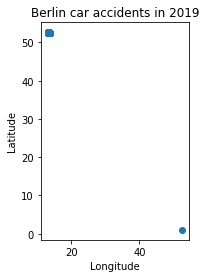

In [24]:
# from matplotlib
gdf.plot()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Berlin car accidents in 2019")

Hmm, it works, but thanks to the plotting we discover another problem. There seems to be all the points in the top left corner, where Berlin is supposed to be, but there is at least one that is far away. Since we already had two problems on the same row, maybe this refers to the same one. 

So let's identify these points with latitude smaller than 10 and let's look at them as a smaller geo data frame.

In [25]:
gdf2 = gdf[gdf.YGCSWGS84 < 10]
gdf2

,OBJECTID,LAND,BEZ,LOR,STRASSE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,geometry
11893,201196,11,10,10020415,Hellersdorfer Promenade,2019,11,8,4,3,...,0,0,0,0,0,5831815.307,13.603547,52.546758,1.0,POINT (52.54676 1.00000)


Indeed, it is the same one as before. Something is wrong in the parsing, as the longitude is instead of LINREFY. We could try to fix it, but we have more than 13k accidents, we can be better of removing this one like, by keeping only those with latitude larger than 10.

In [26]:
gdf = gdf[gdf.YGCSWGS84 > 10]
gdf.shape

(13389, 25)

Plotting looks now better

Text(0.5, 1.0, 'Berlin car accidents in 2019')

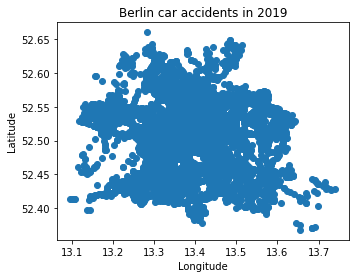

In [27]:
# from matplotlib
gdf.plot()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Berlin car accidents in 2019")

In [28]:
gdf.dtypes

OBJECTID          int64
LAND              int64
BEZ               int64
LOR               int64
STRASSE          object
UJAHR             int64
UMONAT            int64
USTUNDE           int64
UWOCHENTAG        int64
UKATEGORIE        int64
UART              int64
UTYP1             int64
ULICHTVERH        int64
IstRad            int64
IstPKW            int64
IstFuss           int64
IstKrad           int64
IstGkfz           int64
IstSonstige       int64
USTRZUSTAND       int64
LINREFX         float64
LINREFY         float64
XGCSWGS84       float64
YGCSWGS84       float64
geometry       geometry
dtype: object

Text(0.5, 1.0, 'Berlin car accidents in 2019')

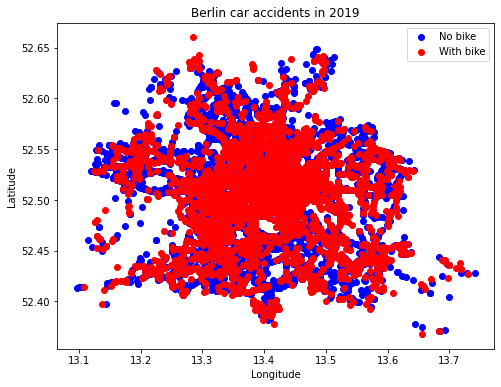

In [29]:
# let's plot only the bike accidents on top
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
gdf[gdf.IstRad == 0].plot(ax = ax, label = "No bike", color = "blue")
gdf[gdf.IstRad == 1].plot(ax = ax, label = "With bike", color = "red")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Berlin car accidents in 2019")

In [30]:
gdf.IstRad.value_counts()

0    8384
1    5005
Name: IstRad, dtype: int64

So almost half of the accidents in Berlin involve bikes. How about motor bikes?

Text(0.5, 1.0, 'Berlin car accidents in 2019')

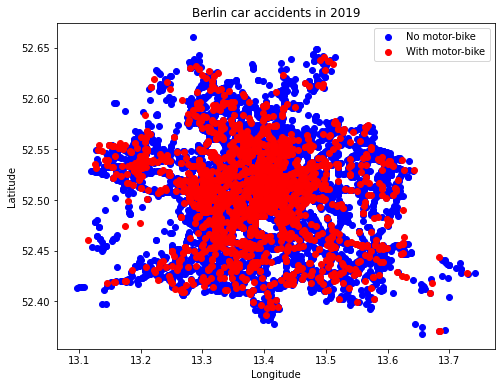

In [31]:
# let's plot only the bike accidents on top
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
gdf[gdf.IstKrad == 0].plot(ax = ax, label = "No motor-bike", color = "blue")
gdf[gdf.IstKrad == 1].plot(ax = ax, label = "With motor-bike", color = "red")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Berlin car accidents in 2019")

In [32]:
gdf.IstKrad.value_counts()

0    11415
1     1974
Name: IstKrad, dtype: int64

Only about 1 in 6 accidents involves a motorbike, so rarer as with real bikes, but they still seem distributed uniformly across the entire city, not localized only in particular areas.

It would be useful to plot also the map of the city below the points, which we will explore in other Juypter Notebooks dedicated to mapping, both static and interactive.

For this, let's store the current prepared and cleaned geo data frame to a file, to simply read it there directly.

# Store to output files of various formats

* .pickle
* .shp

## .pickle

In [33]:
# store the geo data frame to a .pickle file, to be easily read in and plot quickly
# this is only 2.8 MB, but it is still a binary file, that is why we do not store it in the same repo as the code
pd.to_pickle(gdf, f"{OUTPUT_FILE_NAME_STEM}.pickle")

In [34]:
# read it back
gdf2 = pd.read_pickle(f"{OUTPUT_FILE_NAME_STEM}.pickle")
gdf2

,OBJECTID,LAND,BEZ,LOR,STRASSE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,geometry
0,49090,11,12,12301203,Wittenau Süd,2019,1,13,6,3,...,0,0,0,0,1,794062.2837,5835083.823,13.34146,52.58609,POINT (13.34146 52.58609)
1,49091,11,3,3040818,Pankow Süd,2019,1,9,5,3,...,0,0,0,0,0,799130.4007,5832327.415,13.41356,52.55862,POINT (13.41356 52.55862)
2,49093,11,12,12103115,Breitkopfbecken,2019,3,21,6,3,...,0,0,0,0,0,795437.6130,5833549.454,13.36034,52.57159,POINT (13.36034 52.57159)
3,49096,11,6,6040703,Nikolassee,2019,1,7,6,2,...,1,0,0,0,1,786714.3754,5817042.137,13.21777,52.42825,POINT (13.21777 52.42825)
4,49097,11,7,7030303,Grazer Platz,2019,2,15,3,3,...,0,0,0,0,0,796074.3342,5822724.905,13.36007,52.47421,POINT (13.36007 52.47421)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13385,202775,11,1,1011303,Alexanderplatzviertel,2019,12,15,2,3,...,1,0,0,0,0,799498.0190,5828344.449,13.41538,52.52271,POINT (13.41538 52.52271)
13386,202776,11,1,1011201,Wilhelmstraße,2019,12,14,2,3,...,0,0,0,0,0,797455.1835,5827060.276,13.38421,52.51232,POINT (13.38421 52.51232)
13387,202777,11,1,1011304,Karl-Marx-Allee,2019,12,14,2,3,...,0,0,0,1,0,799730.8820,5827547.138,13.41808,52.51544,POINT (13.41808 52.51544)
13388,202778,11,11,11030721,Rüdigerstraße,2019,12,18,4,2,...,0,1,0,0,0,805189.9710,5827912.648,13.49862,52.51569,POINT (13.49862 52.51569)


In [35]:
type(gdf2)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

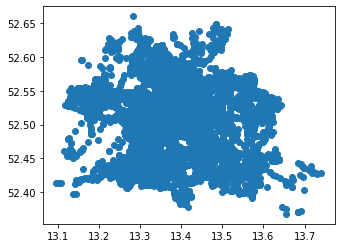

In [36]:
gdf2.plot()

## .shp 

This takes a bit longer (maybe 3 seconds) and creates several files, with a total of about 7 MB, so about 2-3 times larger than with the pure geodata frame.

* -rw-r--r--  1 abuzatu  staff   2.9M 19 Dec 14:47 berlin_2019_car_accidents.pickle
* -rw-r--r--  1 abuzatu  staff    10B 19 Dec 14:49 berlin_2019_car_accidents.cpg
* -rw-r--r--  1 abuzatu  staff   145B 19 Dec 14:49 berlin_2019_car_accidents.prj
* -rw-r--r--  1 abuzatu  staff   6.6M 19 Dec 14:49 berlin_2019_car_accidents.dbf
* -rw-r--r--  1 abuzatu  staff   366K 19 Dec 14:49 berlin_2019_car_accidents.shp
* -rw-r--r--  1 abuzatu  staff   105K 19 Dec 14:49 berlin_2019_car_accidents.shx

In [37]:
# save the GeoDataFrame
gdf.to_file(driver = 'ESRI Shapefile', filename = f"{OUTPUT_FILE_NAME_STEM}.shp")
# the same output coms if the driver is not specified, as below
# gdf.to_file(f"{OUTPUT_FILE_NAME_STEM}.shp")

In [38]:
gdf2 = gpd.read_file(f"{OUTPUT_FILE_NAME_STEM}.shp")
gdf2.head()

,OBJECTID,LAND,BEZ,LOR,STRASSE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstig,USTRZUSTAN,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,geometry
0,49090,11,12,12301203,Wittenau Süd,2019,1,13,6,3,...,0,0,0,0,1,794062.2837,5835083.823,13.34146,52.58609,POINT (13.34146 52.58609)
1,49091,11,3,3040818,Pankow Süd,2019,1,9,5,3,...,0,0,0,0,0,799130.4007,5832327.415,13.41356,52.55862,POINT (13.41356 52.55862)
2,49093,11,12,12103115,Breitkopfbecken,2019,3,21,6,3,...,0,0,0,0,0,795437.6130,5833549.454,13.36034,52.57159,POINT (13.36034 52.57159)
3,49096,11,6,6040703,Nikolassee,2019,1,7,6,2,...,1,0,0,0,1,786714.3754,5817042.137,13.21777,52.42825,POINT (13.21777 52.42825)
4,49097,11,7,7030303,Grazer Platz,2019,2,15,3,3,...,0,0,0,0,0,796074.3342,5822724.905,13.36007,52.47421,POINT (13.36007 52.47421)


In [39]:
type(gdf2)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

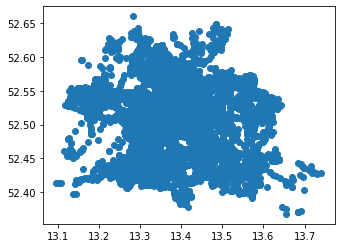

In [40]:
gdf2.plot()

In [41]:
# or directly
gdf.to_file(f"{OUTPUT_FILE_NAME_STEM}_2.shp")